##### Importações

In [3]:
# Manipulação e processamento de imagens
import cv2
import matplotlib.pyplot as plt
import numpy as np

#### 1. Detectar Circulos - Transformada de Hough

In [4]:
# A imagem possui 5 objetos circulares com diâmetros diferentes
# Carregando a imagem
img = cv2.imread("circles.jpg", 0)

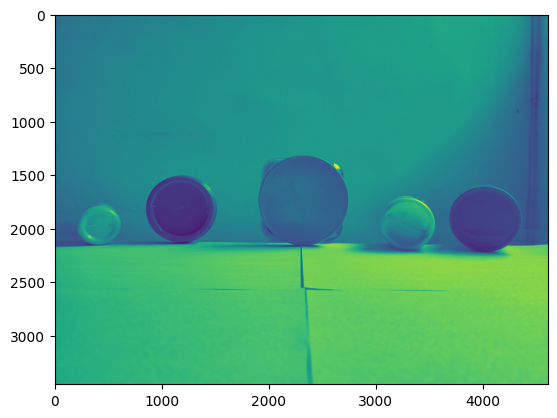

In [5]:
plt.imshow(img)

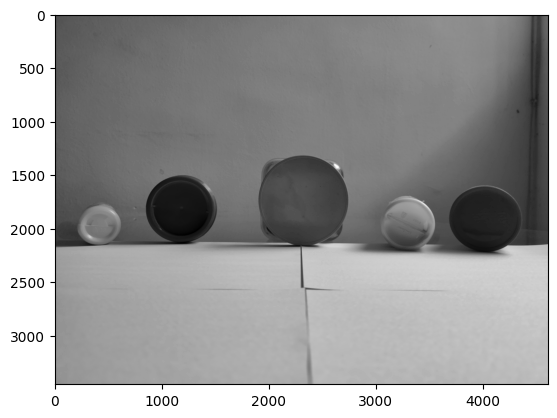

In [6]:
kernel = np.ones((5,5),np.uint8)

grey = cv2.GaussianBlur(img,(9,9),0)
grey = cv2.morphologyEx(grey, cv2.MORPH_OPEN, kernel)
grey = cv2.morphologyEx(grey, cv2.MORPH_CLOSE, kernel)
plt.imshow(grey,cmap="gray")
plt.show()

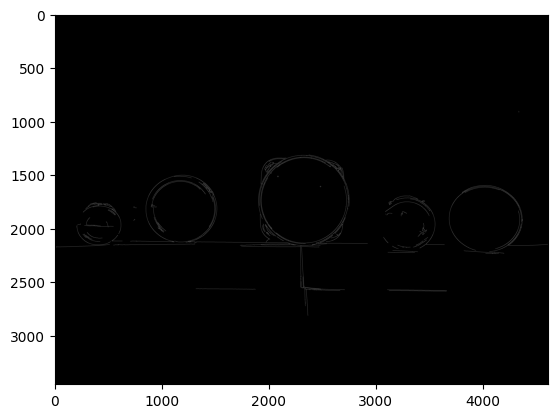

In [7]:
canny = cv2.Canny(grey,10,50)
plt.imshow(canny,cmap="gray")
plt.show()

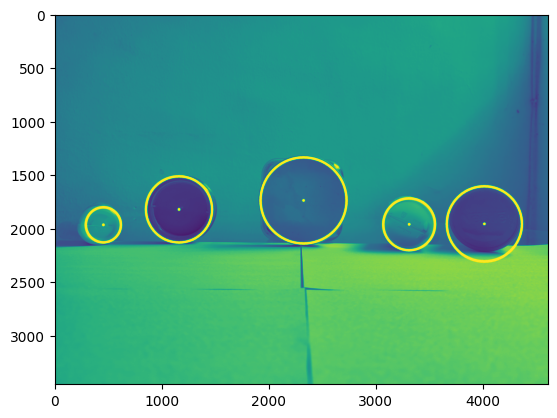

In [8]:
circles = cv2.HoughCircles(
    grey,
    cv2.HOUGH_GRADIENT,
    dp=1.5,
    minDist=300,
    param1=20,
    param2=100,
    minRadius=100,
    maxRadius=500
)

# Changing the dtype  to int
circles = np.uint16(np.around(circles))
cimg = img.copy()
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(255,0,0),25)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(255,0,0),25)

plt.imshow(cimg)